In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

### ALGUNAS DEFINICIONES DE INTERÉS 

-Refugiados bajo el mandato de ACNUR: En resumen, un refugiado es una persona que ha cruzado las fronteras internacionales y ha buscado protección en otro país porque enfrenta amenazas graves en su país de origen.<br>

-Solicitantes de asilo: individuos que han buscado protección internacional y cuyas solicitudes de estatus de refugiado aún no han sido determinadas.<br>

-Personas desplazadas internas: son personas o grupos de personas que han sido obligadas u obligadas a huir o abandonar sus hogares, debido a  conflictos armados, situaciones de violencia generalizada, violaciones de los derechos humanos o desastres naturales, y que no han cruzado una frontera estatal reconocida internacionalmente<br>

-Otras personas que necesitan protección internacional: han sido desplazadas forzosamente a través de fronteras internacionales, que no han sido informadas bajo otras categorías (solicitantes de asilo, refugiados, personas en situaciones similares a las de los refugiados) pero que probablemente necesitan protección internacional <br>

-Otras personas de interés para ACNUR: no necesariamente encajan directamente en ninguno de estos grupos anteriores, pero a quienes el ACNUR ha extendido sus servicios de protección y/o asistencia, basándose en motivos humanitarios <br>

In [20]:
population = pd.read_csv(r'C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\population_final.csv')
population.head()

,Unnamed: 0,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,...,Others of concern,Total forced displacements,Continent_of_Asylum,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
0,0,2023,Philippines,PHL,Poland,POL,5,0,0,0,...,0,5,Europe,Eastern Europe,Asia,South-Eastern Asia,20.0,52.0,122.0,13.0
1,1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,...,0,6,Europe,Eastern Europe,Africa,Southern Africa,20.0,52.0,24.0,-29.0
2,2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,...,0,3386,Europe,Eastern Europe,Europe,Eastern Europe,20.0,52.0,100.0,60.0
3,3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,...,0,5,Europe,Eastern Europe,Africa,Eastern Africa,20.0,52.0,30.0,-2.0
4,4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,...,0,5,Europe,Eastern Europe,Europe,Southern Europe,20.0,52.0,21.0,44.0


In [5]:
population.isnull().sum()   

Year                                                0
Country of origin                                   0
Country of origin (ISO)                             0
Country of asylum                                   0
Country of asylum (ISO)                             0
Refugees under UNHCR's mandate                      0
Asylum-seekers                                      0
IDPs of concern to UNHCR                            0
Other people in need of international protection    0
Stateless persons                                   0
Host Community                                      0
Others of concern                                   0
dtype: int64

In [6]:
population['Host Community'].unique()

array(['0', '12002', '49305', '454831', '15765482', '2581900', '7576',
       '1700', '401356', '1400000', '14521', '3365', '827077', '81620',
       '174850', '13666', '83995', '876000', '3051', '947281', '1038257',
       '406161', '1224393', '96800', '2155', '617687', '81619', '5480',
       '1102358', '640', '11972', '85061', '371594', '15209720', '5433',
       '9346', '596148', '4200', '878451', '-', '3581', '500353', '8165',
       '391', '250000', '4605', '2428906', '4020', '6000', '5226',
       '110526', '741889', '1863', '1301', '84953', '5892', '494710',
       '68880', '9201', '26596', '154150', '472000', '44000', '2351313',
       '2304506'], dtype=object)

Vamos a ver cómo han evolucionado el número de personas forzadas a desplazarse a través de los años

In [7]:
# Queremos comprobar la columa other people in need of international protection que valores tiene para poder convertirla a númerica y poder sumarla a las demás columnas
population['Other people in need of international protection'].unique() 

array(['-', '10878', '23628', '17000', '14000', '51156', '146559', '311',
       '980470', '214771', '15428', '310148', '436060', '2452890',
       '18900', '114805', '495481', '19635', '53027', '146696', '1004',
       '969817', '165174', '13531', '264040', '436845', '2453862',
       '16598', '14178', '23023', '113722', '495304', '128000', '1910',
       '791442', '60', '8403', '14995', '5', '25', '175992', '92',
       '500271', '1842390', '21766', '116000', '503882', '234', '1469',
       '25800', '164622', '11805', '67', '63179', '81847', '118937',
       '2879', '515039', '19', '171659', '9557', '163754', '39', '454547',
       '1729537', '22401', '114050', '401777', '23307', '4663', '14063',
       '14', '21', '16691', '38', '11', '16602', '16190', '115768',
       '3588', '377864', '7664', '14362', '5472', '123507', '52',
       '452712', '1771237', '20828', '33816', '374045', '173343', '22000',
       '121', '52982', '42104', '94400', '803', '428214', '127152',
       '39771',

In [8]:
population['Other people in need of international protection'].isnull().mean() 

0.0

In [9]:
#reemplazar los valores '-' por np.nan en la columna 'Other people in need of international protection'
population['Other people in need of international protection'] = population['Other people in need of international protection'].replace('-', 0).astype(int)
population

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
0,2023,Philippines,PHL,Poland,POL,5,0,0,0,0,0,0
1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,0,0,0
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,0,0,0
3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,0,0,0
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
125684,1951,Unknown,UNK,Switzerland,CHE,10000,0,0,0,0,-,0
125685,1951,Unknown,UNK,Tunisia,TUN,2000,0,0,0,0,-,0
125686,1951,Unknown,UNK,Türkiye,TUR,2700,0,0,0,0,-,0
125687,1951,Unknown,UNK,United States of America,USA,350000,0,0,0,0,-,0


In [10]:
# Queremos calcular el porcentaje  de 0s en other of concern
population['Others of concern'].value_counts(normalize=True) * 100

# Vemos que el 98% de los valores son 0s, pero la dejamos porque es una columna importante para el estudio

0         98.099277
5          0.290399
6          0.064445
7          0.046146
10         0.040576
            ...    
497        0.000796
129445     0.000796
1747       0.000796
2941       0.000796
600        0.000796
Name: Others of concern, Length: 930, dtype: float64

In [ ]:
# Aunque en las columnas de 'Other people in need of international protection' y 'Others of concern' hay un alto porcentaje de 0s, lo dejamos porque son columnas que nos interesan en el estudio

In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125689 entries, 0 to 125688
Data columns (total 12 columns):
 #   Column                                            Non-Null Count   Dtype 
---  ------                                            --------------   ----- 
 0   Year                                              125689 non-null  int64 
 1   Country of origin                                 125689 non-null  object
 2   Country of origin (ISO)                           125689 non-null  object
 3   Country of asylum                                 125689 non-null  object
 4   Country of asylum (ISO)                           125689 non-null  object
 5   Refugees under UNHCR's mandate                    125689 non-null  int64 
 6   Asylum-seekers                                    125689 non-null  int64 
 7   IDPs of concern to UNHCR                          125689 non-null  int64 
 8   Other people in need of international protection  125689 non-null  int32 
 9   Stateless perso

In [12]:
# Vamos a eliminar la columna Host community al no aportar información relevante
population.drop(['Host Community'], axis=1, inplace=True)

In [13]:
# hacer una nueva columna que sea la suma de los diferentes tipos tipos de refugiados
population['Total forced displacements'] = population['Refugees under UNHCR\'s mandate'] + population['Asylum-seekers'] + population['IDPs of concern to UNHCR']+population['Others of concern']+population['Other people in need of international protection']

# Vamos ahora a complementar nuestro dataset añadiéndole a cada país el continente y sub-región tanto de origen como de asilo haciendo un merge entre los dos datasets

In [14]:
# Cargamos el dataset con los datos de los países y continentes
continent = pd.read_csv('Data\countryContinent.csv')
continent = continent[['code_3', 'continent', 'sub_region']]

In [15]:
continent
continent.to_csv('Data/continent_clean.csv')

In [16]:
# añadir nueva columna con el continente y subregion a population
#primero creo un diccionario con los valores de code_3 como keys y continent y sub_region como values
continent_dict = dict(zip(continent.code_3, continent.continent))


In [17]:
continent_dict


{'AFG': 'Asia',
 'ALA': 'Europe',
 'ALB': 'Europe',
 'DZA': 'Africa',
 'ASM': 'Oceania',
 'AND': 'Europe',
 'AGO': 'Africa',
 'AIA': 'Americas',
 'ATA': nan,
 'ATG': 'Americas',
 'ARG': 'Americas',
 'ARM': 'Asia',
 'ABW': 'Americas',
 'AUS': 'Oceania',
 'AUT': 'Europe',
 'AZE': 'Asia',
 'BHS': 'Americas',
 'BHR': 'Asia',
 'BGD': 'Asia',
 'BRB': 'Americas',
 'BLR': 'Europe',
 'BEL': 'Europe',
 'BLZ': 'Americas',
 'BEN': 'Africa',
 'BMU': 'Americas',
 'BTN': 'Asia',
 'BOL': 'Americas',
 'BES': 'Americas',
 'BIH': 'Europe',
 'BWA': 'Africa',
 'BVT': nan,
 'BRA': 'Americas',
 'IOT': nan,
 'BRN': 'Asia',
 'BGR': 'Europe',
 'BFA': 'Africa',
 'BDI': 'Africa',
 'KHM': 'Asia',
 'CMR': 'Africa',
 'CAN': 'Americas',
 'CPV': 'Africa',
 'CYM': 'Americas',
 'CAF': 'Africa',
 'TCD': 'Africa',
 'CHL': 'Americas',
 'CHN': 'Asia',
 'CXR': nan,
 'CCK': nan,
 'COL': 'Americas',
 'COM': 'Africa',
 'COG': 'Africa',
 'COD': 'Africa',
 'COK': 'Oceania',
 'CRI': 'Americas',
 'CIV': 'Africa',
 'HRV': 'Europe',


In [18]:
subregion_dict = dict(zip(continent.code_3, continent.sub_region))
population['Sub_Region_of_Asylum'] = population['Country of asylum (ISO)'].map(subregion_dict)
population['Continent_of_origin']=population['Country of origin (ISO)'].map(continent_dict)
population['Sub_Region_of_Origin'] =  population['Country of origin (ISO)'].map(subregion_dict)

In [19]:
#ahora creo una nueva columna en population que se llame continent y que tenga los valores de continent_dict
population['Continent_of_Asylum'] = population['Country of asylum (ISO)'].map(continent_dict)

In [20]:
#Comprobar los paises que tienen valores nulos en continent os asylum 
population[population['Continent_of_Asylum'].isnull()]['Country of asylum (ISO)'].unique()

#UNK corresponde a Unknown por lo tanto, no hay ningún país sin continente asignado, así que perfecto. 

array(['UNK'], dtype=object)

In [21]:
population

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Others of concern,Total forced displacements,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Continent_of_Asylum
0,2023,Philippines,PHL,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Asia,South-Eastern Asia,Europe
1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,0,0,6,Eastern Europe,Africa,Southern Africa,Europe
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,0,0,3386,Eastern Europe,Europe,Eastern Europe,Europe
3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Africa,Eastern Africa,Europe
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Europe,Southern Europe,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125684,1951,Unknown,UNK,Switzerland,CHE,10000,0,0,0,0,0,10000,Western Europe,NaN,NaN,Europe
125685,1951,Unknown,UNK,Tunisia,TUN,2000,0,0,0,0,0,2000,Northern Africa,NaN,NaN,Africa
125686,1951,Unknown,UNK,Türkiye,TUR,2700,0,0,0,0,0,2700,Western Asia,NaN,NaN,Asia
125687,1951,Unknown,UNK,United States of America,USA,350000,0,0,0,0,0,350000,Northern America,NaN,NaN,Americas


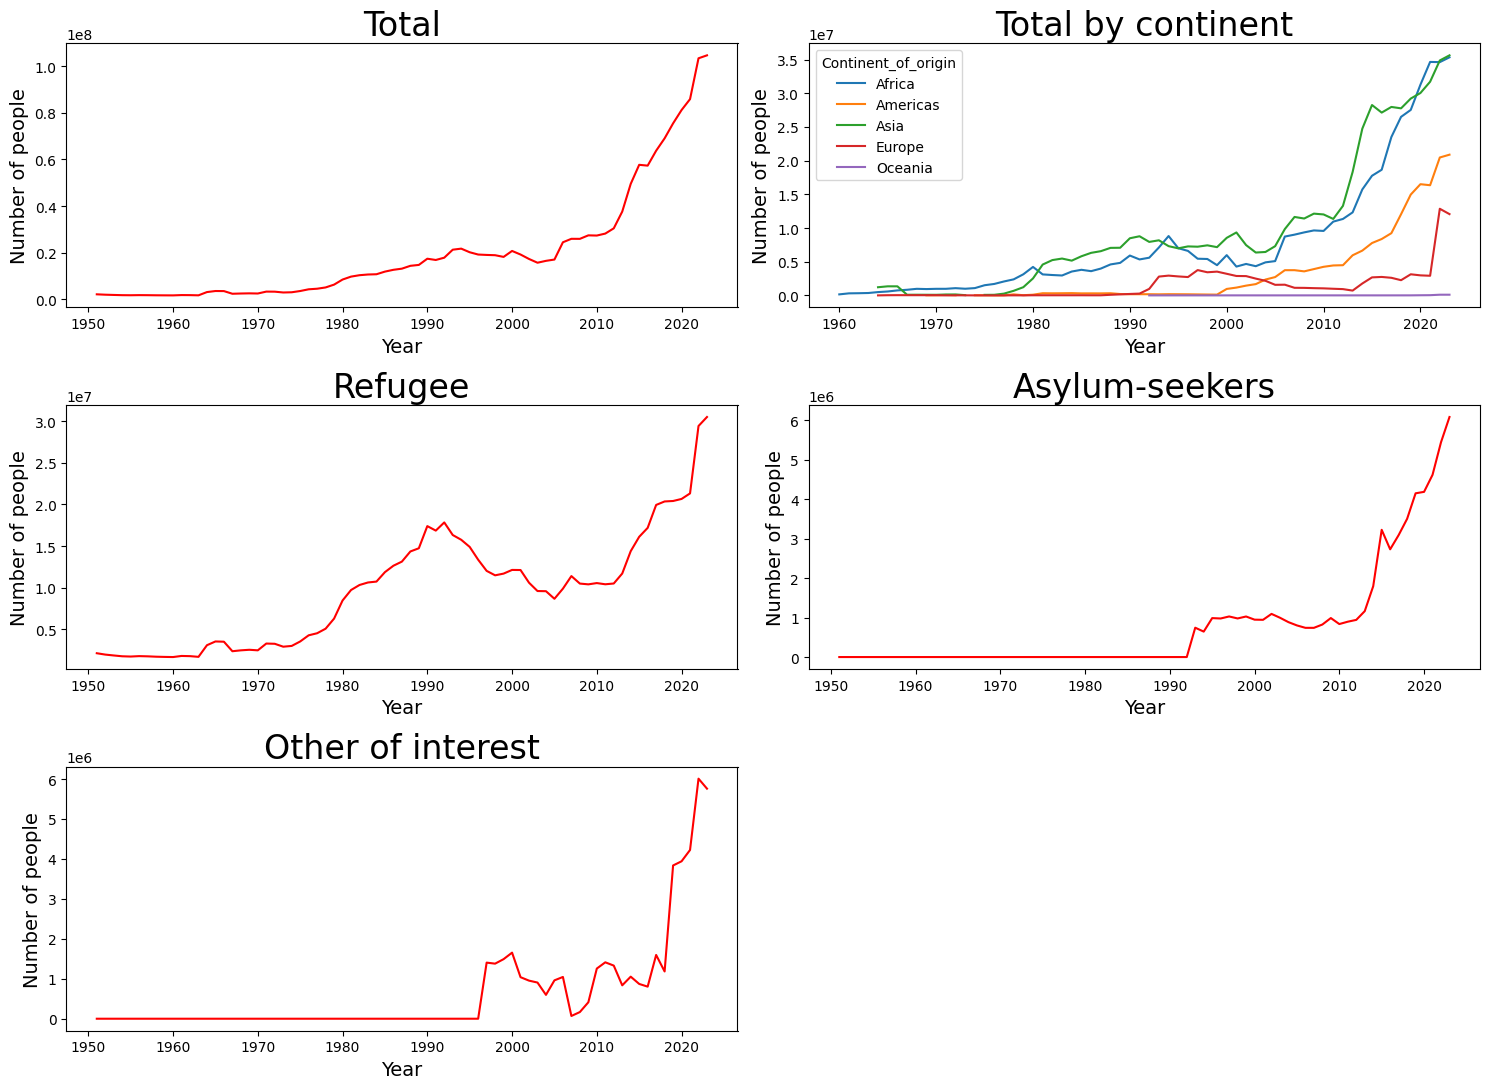

In [22]:

#Evoluicon de los datos de refugiados por año (totales, por continente y por tipo de desplazamiento forzado)
refugee = population.groupby(['Year'])['Refugees under UNHCR\'s mandate'].sum()
asylum_seek = population.groupby(['Year'])['Asylum-seekers'].sum()
others = population.groupby(['Year'])['Others of concern'].sum()
total = population.groupby(['Year'])['Total forced displacements'].sum()
continent = population.groupby(['Year', 'Continent_of_origin'])['Total forced displacements'].sum().unstack()

fig = plt.figure(figsize=(15, 11))

ax1 = fig.add_subplot(321)
ax1 = total.plot(kind='line', color='red')  # Corrected from 'others' to 'total'
ax1.set_title("Total", fontsize=24)
ax1.set_ylabel('Number of people', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

ax2 = fig.add_subplot(322)
ax2 = continent.plot(kind='line', ax=ax2)  # Added ax=ax5
ax2.set_title("Total by continent", fontsize=24)
ax2.set_ylabel('Number of people', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)

ax3 = fig.add_subplot(323)
ax3 = refugee.plot(kind='line', color='red')
ax3.set_title("Refugee", fontsize=24)
ax3.set_ylabel('Number of people', fontsize=14)
ax3.set_xlabel('Year', fontsize=14)

ax4 = fig.add_subplot(324)
ax4 = asylum_seek.plot(kind='line', color='red')
ax4.set_title("Asylum-seekers", fontsize=24)
ax4.set_ylabel('Number of people', fontsize=14)
ax4.set_xlabel('Year', fontsize=14)

ax5 = fig.add_subplot(325)
ax5 = others.plot(kind='line', color='red')
ax5.set_title("Other of interest", fontsize=24)
ax5.set_ylabel('Number of people', fontsize=14)
ax5.set_xlabel('Year', fontsize=14)




plt.tight_layout()
plt.show()


In [24]:
import plotly.express as px
import pandas as pd
plot_px = population[population['Year']>1979].groupby(['Year','Country of origin','Origin_longitude','Origin_latitude'])['Total forced displacements'].sum().reset_index().sort_values('Year', ascending=True)
plot_px['Total forced displacements']=(plot_px['Total forced displacements']/1000000).round(2)
# Crear el mapa interactivo con Plotly Express
fig = px.scatter_mapbox(plot_px, 
                        lat='Origin_latitude', 
                        lon='Origin_longitude', 
                        size='Total forced displacements', 
                        animation_frame='Year',  # Esto permite la animación a lo largo de los años
                        animation_group='Country of origin',
                        color='Total forced displacements',
                        range_color=[plot_px['Total forced displacements'].min(), plot_px['Total forced displacements'].max()],
                        zoom=1,
                        mapbox_style='open-street-map',  # Cambiar el estilo del mapa
                        title='Forced Displacements Over Time',
                        template='plotly_dark',
                        size_max=20,
                        labels={'Country of origin': 'Country'},
                        hover_name='Country of origin'  # Esta línea especifica la columna para las etiquetas al pasar el ratón
                       )

# Ajustar el tamaño del mapa y otros parámetros
fig.update_layout(mapbox=dict(center=dict(lat=0, lon=0)),  # Centrar el mapa en latitud 0, longitud 0
                  mapbox_style='open-street-map',  # Cambiar el estilo del mapa
                  margin=dict(r=0, l=0, t=0, b=0),  # Reducir los márgenes
                  coloraxis_colorbar=dict(yanchor='top', y=1, x=0.01, xanchor='left'),  # Mover la barra de colores a la izquierda
                  coloraxis_colorbar_len=0.5,
                  coloraxis_colorbar_ticktext=['1951', '2023'],
                  coloraxis_colorbar_tickvals=[plot_px['Total forced displacements'].min(), plot_px['Total forced displacements'].max()]  # Valores de las marcas de la barra de colores
                  )                                         

# Mostrar el gráfico
fig.show()

In [23]:
# 1994 genocidio de Ruanda y 1998 guerra civil en Congo
# 2003 guerra de Irak 
# 2011 guerra de Siria
# 2014 guerra de Yemen
# 2022 guerra de Ucrania 

In [24]:
# Poner a continuacion la grafica de plotly scatter de refugiados por continente y año y comentar los diferentes conflictos que han ocurrido en los diferentes continentes. 

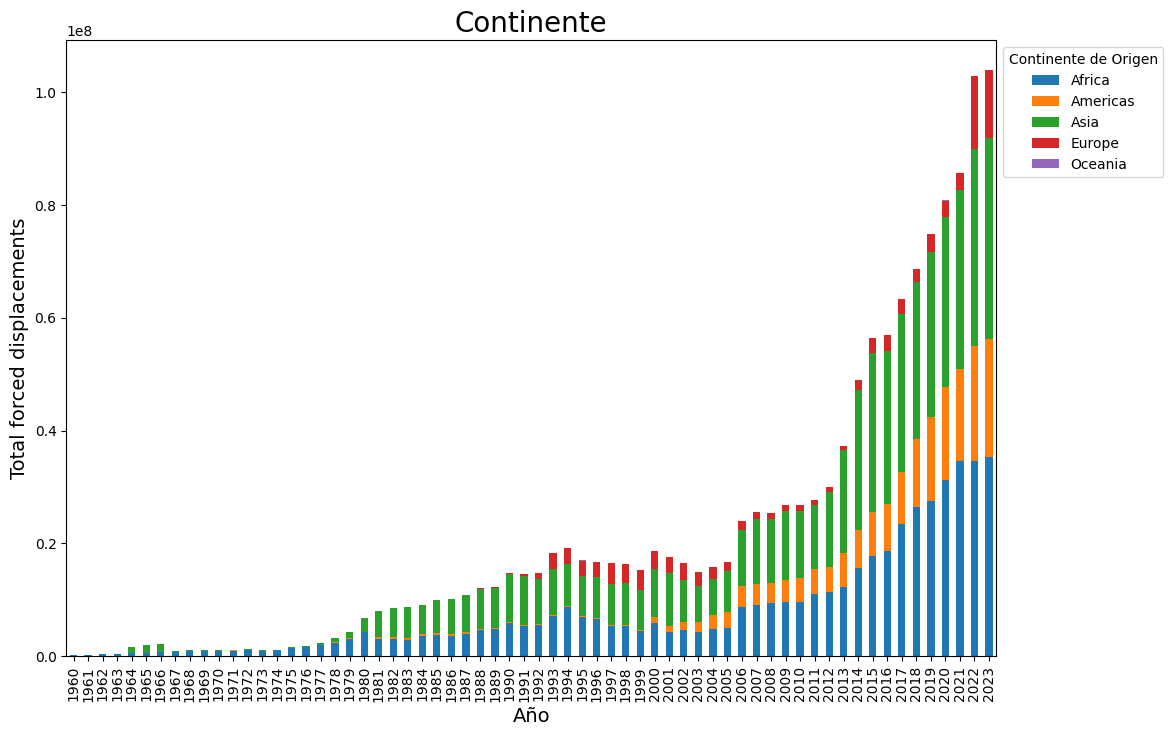

In [25]:

df_grouped = population.groupby(['Continent_of_origin', 'Year'])['Total forced displacements'].sum().reset_index()

#Gráfico de barras apiladas
ax = df_grouped.pivot(index='Year', columns='Continent_of_origin', values='Total forced displacements').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total forced displacements', fontsize = 14)
plt.title('Continente', fontsize = 20)
plt.legend(title='Continente de Origen', bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()

In [26]:
population_filtered = population[population['Year'] >= 2000]
asylum_grouped = population_filtered.groupby(['Continent_of_Asylum', 'Year'])['Total forced displacements'].sum().reset_index()
fig = px.bar(asylum_grouped, x='Year', y='Total forced displacements', color='Continent_of_Asylum', labels={'Total forced displacements': 'Total forced displacements'},title='Conitnent of Asylum')  
fig.show()

In [27]:
origin_grouped = population_filtered.groupby(['Continent_of_origin', 'Year'])['Total forced displacements'].sum().reset_index()
fig = px.bar(origin_grouped, x='Year', y='Total forced displacements', color='Continent_of_origin', labels={'Total forced displacements': 'Total forced displacements'},title='Conitnent of origin')
            
fig.show()

In [28]:
import geopandas as gpd
from branca.colormap import LinearColormap
import folium
import plotly.express as px 

# Añadimos 4 nuevas columas con las latitudes y longitudes de los paises de origen y de asilo 

In [46]:
lat_lon = pd.read_csv(r'C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\Data\lat_lon.csv')
lat_lon = lat_lon[['Alpha-3 code', 'Latitude (average)', 'Longitude (average)']]
lat_lon.rename(columns={'Latitude (average)': 'Latitude', 'Longitude (average)':'Longitude'}, inplace=True)
lat_lon['Alpha-3 code'].replace('"', '', regex=True, inplace=True) #eliminamos las comillas de la columna Alpha-3 code
lat_lon['Alpha-3 code'].replace(' ', '', regex=True, inplace=True)  #eliminamos los espacios en blanco de la columna Alpha-3 code para poder hacer el merge con el dataset population
lat_lon['Latitude'].replace('"', '', regex=True, inplace=True)#eliminamos las comillas de la columna Latitude
lat_lon['Longitude'].replace('"', '', regex=True, inplace=True) #eliminamos las comillas de la columna Longitude p

In [48]:
ll_or = lat_lon.copy()
ll_or.rename(columns={'Alpha-3 code': 'Country of origin (ISO)'}, inplace=True) #renombramos la columna Alpha-3 code a Country of origin (ISO) para poder hacer el merge con population en la columna paises de origen

In [49]:
ll_as = lat_lon.copy()  
ll_as.rename(columns={'Alpha-3 code': 'Country of asylum (ISO)'}, inplace=True)  #renombramos la columna Alpha-3 code a Country of asylum (ISO) para poder hacer el merge con population, en la columna paises de asilo

In [50]:
ll_as

,Country of asylum (ISO),Latitude,Longitude
0,AFG,33,65
1,ALB,41,20
2,DZA,28,3
3,ASM,-14.3333,-170
4,AND,42.5,1.6
...,...,...,...
251,WLF,-13.3,-176.2
252,ESH,24.5,-13
253,YEM,15,48
254,ZMB,-15,30


In [51]:
#creamos las nuevas columnas y las añadimos al df population

In [52]:
ll_as_dict = dict(zip(ll_as['Country of asylum (ISO)'], ll_as['Longitude']))
population['Asylum_longitude'] = population['Country of asylum (ISO)'].map(lambda x: ll_as_dict.get(x))
ll_as_dict = dict(zip(ll_as['Country of asylum (ISO)'], ll_as['Latitude']))
population['Asylum_latitude'] = population['Country of asylum (ISO)'].map(lambda x: ll_as_dict.get(x))
ll_or_dict = dict(zip(ll_or['Country of origin (ISO)'], ll_or['Longitude']))
population['Origin_longitude'] = population['Country of origin (ISO)'].map(lambda x: ll_or_dict.get(x))

ll_or_dict = dict(zip(ll_or['Country of origin (ISO)'], ll_or['Latitude']))
population['Origin_latitude'] = population['Country of origin (ISO)'].map(lambda x: ll_or_dict.get(x))

In [53]:
population

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Others of concern,Total forced displacements,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Continent_of_Asylum,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
0,2023,Philippines,PHL,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Asia,South-Eastern Asia,Europe,20,52,122,13
1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,0,0,6,Eastern Europe,Africa,Southern Africa,Europe,20,52,24,-29
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,0,0,3386,Eastern Europe,Europe,Eastern Europe,Europe,20,52,100,60
3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Africa,Eastern Africa,Europe,20,52,30,-2
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Europe,Southern Europe,Europe,20,52,21,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125684,1951,Unknown,UNK,Switzerland,CHE,10000,0,0,0,0,0,10000,Western Europe,NaN,NaN,Europe,8,47,None,None
125685,1951,Unknown,UNK,Tunisia,TUN,2000,0,0,0,0,0,2000,Northern Africa,NaN,NaN,Africa,9,34,None,None
125686,1951,Unknown,UNK,Türkiye,TUR,2700,0,0,0,0,0,2700,Western Asia,NaN,NaN,Asia,35,39,None,None
125687,1951,Unknown,UNK,United States of America,USA,350000,0,0,0,0,0,350000,Northern America,NaN,NaN,Americas,-97,38,None,None


In [55]:
#syria, venezuela , afganistan, ukrania y sudan son los paises con mas refugiados en 2022.
# sumar los refugiados de syria, venezuela, afganistan, ukrania y sudan en 2022 y calcular porcentaje del total 
# de refugiados en 2022

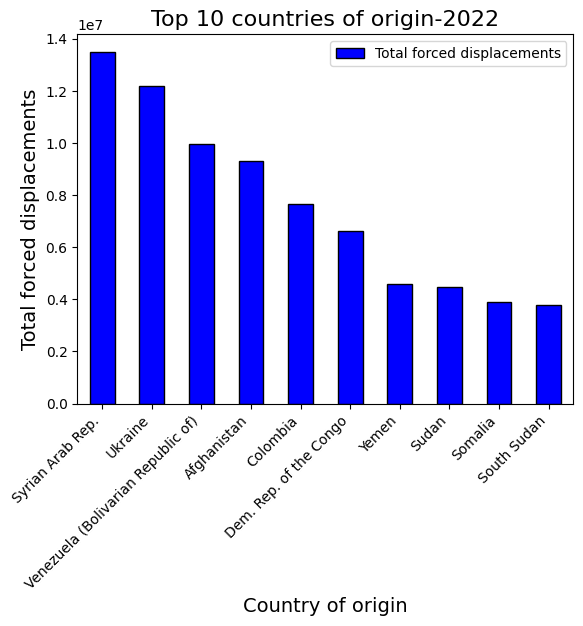

In [19]:
country = population[population['Year']==2022].groupby('Country of origin')['Total forced displacements'].sum().reset_index().sort_values('Total forced displacements', ascending=False).head(10)
country.plot(kind='bar', x='Country of origin', y='Total forced displacements', color='blue', edgecolor='black')
plt.ylabel('Total forced displacements', fontsize=14)
plt.xlabel('Country of origin', fontsize=14)
plt.title('Top 10 countries of origin-2022', fontsize=16)
plt.xticks(rotation=45, ha = 'right')
plt.show()



In [60]:
#Creamos una tabla con los 10 paises que mas refugiados reciben de ucrania, en el año 2022: 

def top_10(country, year):
    df = population[(population['Country of origin'] == country) & (population['Year'] == year)]
    df = df.groupby(['Country of origin','Country of asylum', 'Asylum_latitude', 'Asylum_longitude', 'Origin_latitude', 'Origin_longitude'])['Total forced displacements'].sum().reset_index()
    df.sort_values('Total forced displacements', ascending=False, inplace=True)
    df = df.head(10)
    return df
ukr = top_10('Ukraine', 2022)
syr = top_10('Syrian Arab Rep.', 2022)
afg = top_10('Afghanistan', 2022)
ven = top_10('Venezuela (Bolivarian Republic of)', 2022)

#creamos un df que combine los 4 paises 
combined_data = pd.concat([ukr, syr, afg, ven])
combined_data['Total forced displacements'] = combined_data['Total forced displacements']/1000000

# Create a new figure
fig = go.Figure()

#creamos una lista con las latitudes y longitudes de origen y destino, el total de desplazados y el pais de asilo y origen
source_to_dest = zip(combined_data["Origin_latitude"], combined_data["Asylum_latitude"],
                     combined_data["Origin_longitude"], combined_data["Asylum_longitude"],
                     combined_data["Total forced displacements"], combined_data["Country of asylum"], combined_data["Country of origin"])

#bucle for para cada elemento de la lista, en el orden en el que aparecen en la lista

for idx, (olat, alat, olon, alon, displacements, country_asylum, country_origin) in enumerate(source_to_dest):
    # Características de la línea entre origen y destino
    fig.add_trace(go.Scattergeo(
        lat=[olat, alat],
        lon=[olon, alon],
        mode='lines',
        line=dict(width=displacements, color= 'red')
    ))
    # Caracteristicas del país de origen
    fig.add_trace(go.Scattergeo(
        lat=[olat],
        lon=[olon],
        mode='markers',
        marker=dict(size=5, color="lightblue", symbol="circle"),
        #text=f'Origin: {ukr["Country of origin (ISO)"].unique()}',
        showlegend=False
    ))
    # Label for the destination country
    fig.add_trace(go.Scattergeo(
        lat=[alat],
        lon=[alon+idx*0.01],
        mode='markers',
        marker=dict(size=8, color="blue", symbol="circle"),
        text=f'Origin: {country_origin}<br>Destination: {country_asylum}<br>Displacements: {displacements}',
        showlegend=False
    ))
 
fig.update_layout(
    title_text=f'{combined_data["Country of origin"].unique()[0]} to {combined_data["Country of asylum"].unique()[0]}',
    height=700,
    width=900,
    margin={"t": 0, "b": 0, "l": 0, "r": 0, "pad": 0},
    showlegend=False,
        geo=dict(
        landcolor='white',
        lakecolor='white',
        bgcolor='lightblue',
        projection_type='natural earth'
        )
)

fig.show()

# Análisis de Datos: Solicitudes de Asilo desde el Año 2020



A continuación, exploraremos el conjunto de datos que proporciona información detallada sobre solicitudes de asilo desde el año 2020. Estas solicitudes abarcan diferentes etapas del procedimiento, autoridades gubernamentales, y tipos de protección complementaria. El objetivo es comprender la dinámica de las solicitudes de asilo y analizar las decisiones tomadas en diversos contextos.

## Descripción del Conjunto de Datos

El conjunto de datos contiene las siguientes columnas:

1. **Year:** Año en el que se registró la solicitud de asilo.
2. **Country of Origin:** País de origen del solicitante.
3. **Country of Origin (ISO):** Código ISO del país de origen.
4. **Country of Asylum:** País donde se presentó la solicitud de asilo.
5. **Country of Asylum (ISO):** Código ISO del país de asilo.
6. **Authority:** Autoridad responsable del proceso de asilo (G - Gobierno, J - Conjunto, U - ACNUR).
7. **Stage of Procedure:** Etapa del procedimiento de asilo (NA, FI, AR, RA, IN, EO, JR, SP, FA, TP, TA, BL, TR, CA).
8. **Cases / Persons:** Número de casos o personas asociadas a la solicitud.
9. **Recognized Decisions:** Decisiones de asilo reconocidas.
10. **Complementary Protection:** Protección complementaria otorgada.
11. **Rejected Decisions:** Decisiones de asilo rechazadas.
12. **Otherwise Closed:** Casos cerrados de otra manera.
13. **Total Decisions:** Total de decisiones tomadas.

## Significado de Algunas Columnas

- **Authority:**
    - **G (Gobierno):** Autoridad gubernamental responsable del proceso de asilo.
    - **J (Conjunto):** Decisiones conjuntas entre autoridades.
    - **U (ACNUR):** Decisiones tomadas por el Alto Comisionado de las Naciones Unidas para los Refugiados.


- **Stage of Procedure:**

    - **NA (Nuevas Solicitudes):** 
    - **FI (Decisiones de Primera Instancia):** 
    - **AR (Decisiones de Revisión Administrativa):** 
    - **RA (Solicitudes Repetidas o Reabiertas):** 
    - **IN (Servicios de Ciudadanía e Inmigración de EE. UU.):** 
    - **EO (Oficina Ejecutiva de Revisión de Inmigración de EE. UU.):**
    - **JR (Revisión Judicial):** 
    - **SP (Protección Subsidiaria):** 
    - **FA (Primera Instancia y Apelación):** 
    - **TP (Protección Temporal):** 
    - **TA (Asilo Temporal):** 
    - **BL (Acumulación de Casos):** 
    - **TR (Permiso Temporal para Permanecer Fuera del Proceso de Asilo):** 
    - **CA (Regulaciones Cantonales en Suiza):** 



- **Data Type:**
    - **P (Personas):** Indica que las cifras se refieren al número de personas afectadas por las decisiones de asilo.
    - **C (Casos):** Indica que las cifras se refieren al número de casos de solicitudes de asilo.

Este análisis proporcionará una visión general de las tendencias en las solicitudes de asilo, las decisiones tomadas en diferentes etapas y autoridades involucradas, así como la distribución de casos y personas afectadas.


In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
asylum = asylum = pd.read_csv('Data/asylum_decisions.csv')

In [3]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
2,2016,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,164926,121182,158,5398,291664
3,2017,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,34201,55274,107,7309,96891
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332


In [4]:
print(asylum.shape)
print(asylum.info())

(101476, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101476 entries, 0 to 101475
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Year                      101476 non-null  int64 
 1   Country of origin         101476 non-null  object
 2   Country of origin (ISO)   101476 non-null  object
 3   Country of asylum         101476 non-null  object
 4   Country of asylum (ISO)   101476 non-null  object
 5   Authority                 101476 non-null  object
 6   Stage of procedure        99339 non-null   object
 7   Cases / Persons           101476 non-null  object
 8   Recognized decisions      101476 non-null  int64 
 9   Complementary protection  101476 non-null  int64 
 10  Rejected decisions        101476 non-null  int64 
 11  Otherwise closed          101476 non-null  int64 
 12  Total decisions           101476 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 10.1+ MB


In [5]:
# comprobamos distribución de valores por columna
print(asylum['Authority'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Stage of procedure'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Cases / Persons'].value_counts(dropna=False)/len(asylum)*100)

G    87.099413
U    12.263984
J     0.636604
Name: Authority, dtype: float64
FI     57.422445
AR     17.719461
FA      7.862943
RA      4.738066
IN      3.148528
EO      3.072648
JR      2.852891
NaN     2.105917
TA      0.427687
SP      0.298593
CA      0.174425
BL      0.093618
TP      0.081793
TR      0.000985
Name: Stage of procedure, dtype: float64
P    92.683984
C     7.316016
Name: Cases / Persons, dtype: float64


<Axes: >

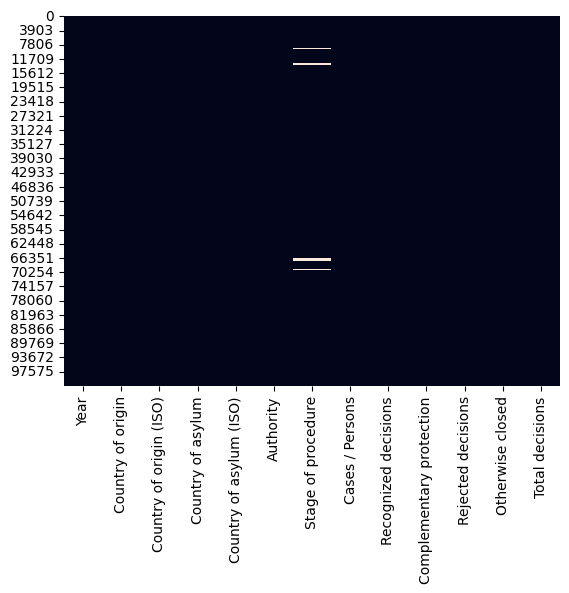

In [6]:
# heatmap para ver los Nan, como hemos visto antes solo hay una columna con nulos, que respresenan el 2,1% de los datos así que podemos eliminarlos
# pero vamos a estudiarlos más en profundidad
sns.heatmap(asylum.isnull(), cbar=False)


In [7]:
# vamos a comparar la distribución de los datos en el DataFrame total con solo los datos donde solo hay Nan 
asylum_nan = asylum[asylum['Stage of procedure'].isna()]

In [8]:
print(asylum_nan['Authority'].value_counts(dropna=False)/len(asylum_nan)*100)

print(asylum_nan['Cases / Persons'].value_counts(dropna=False)/len(asylum_nan)*100)

G    99.906411
U     0.093589
Name: Authority, dtype: float64
P    100.0
Name: Cases / Persons, dtype: float64


In [9]:
pd.DataFrame(asylum_nan['Country of origin'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of origin
Syrian Arab Rep.,1.029481
Iraq,1.029481
Guinea-Bissau,0.982686
Tunisia,0.982686
Benin,0.982686
Viet Nam,0.982686
Togo,0.982686
North Macedonia,0.982686
Myanmar,0.982686
Bosnia and Herzegovina,0.982686


In [10]:
pd.DataFrame(asylum_nan['Country of asylum'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of asylum
Germany,99.906411
United Arab Emirates,0.093589


In [11]:
# observamos que los nulos se concentran casi en un 100% en las solicitudes de asilo en Alemania, por lo que podemos eliminarlos sin miedo a perder información relevante o cambiar la distribución de los datos
asylum.dropna(inplace=True) 

In [12]:
# Guardamos el DataFrame limpio en un csv
# asylum.to_csv('Data/asylum_decisions_CLEAN.csv', index=False)

### Exploratory Data Analysis

In [13]:
# Una vez limpio el DataFrame, vamos a estudiarlo más en profundidad
print(f'El dataset tiene {asylum.shape[0]} filas y {asylum.shape[1]} columnas')
asylum.head()

El dataset tiene 99339 filas y 13 columnas


,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


In [14]:
# Porcentaje de solicitudes por país entre 2000-2023 por país solicitante
top10_origin = pd.DataFrame(asylum['Country of origin'].value_counts(dropna=False)/len(asylum)*100).head(10)
print("Vemos que los 10 países de origen de las solicitudes de asilo representan un", top10_origin['Country of origin'].sum().round(2), "del total de solicitudes")
top10_origin

Vemos que los 10 países de origen de las solicitudes de asilo representan un 19.8 del total de solicitudes


,Country of origin
Dem. Rep. of the Congo,2.167326
Iraq,2.155246
Afghanistan,2.104913
Somalia,2.091827
Iran (Islamic Rep. of),1.993175
Pakistan,1.937809
Syrian Arab Rep.,1.907609
Nigeria,1.898549
Sudan,1.857277
Ethiopia,1.688159


In [15]:
# Porcentaje de solicitudes recibidas por país entre 2000-2023 
top10_asylum = pd.DataFrame(asylum['Country of asylum'].value_counts(dropna=False)/len(asylum)*100).head(10)
print('Entre los 10 países que más solicitudes han recibido, acaparan el', top10_asylum['Country of asylum'].sum().round(2), 'de las solicitudes')
top10_asylum


Entre los 10 países que más solicitudes han recibido, acaparan el 40.92 de las solicitudes


,Country of asylum
United States of America,7.052618
Sweden,5.144002
Canada,4.436324
United Kingdom of Great Britain and Northern Ireland,4.271233
France,4.167547
Netherlands (Kingdom of the),3.319945
Norway,3.253506
Belgium,3.217266
Australia,3.080361
Germany,2.980702


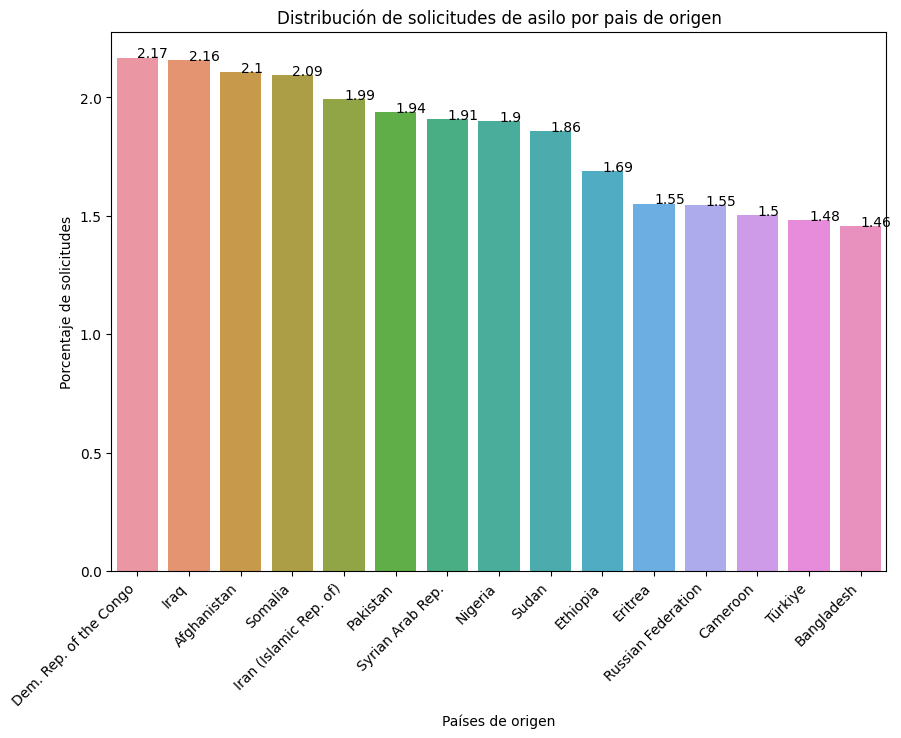

In [16]:
# vamos a empezar haciendo un gráifco de barras para ver la distribución de los datos en las columnas que nos interesan
# En este caso veremos cómo se distribuyen las solicitudes de asilo por país de origen
plt.figure(figsize=(10,7))
total_counts = len(asylum)
country_counts = asylum['Country of origin'].value_counts().head(15)
country_percentages = (country_counts / total_counts) * 100
sns.barplot(x=country_percentages.index, y=country_percentages.values)
for index, value in enumerate(country_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=45,ha='right')
plt.xlabel('Países de origen')
plt.ylabel('Porcentaje de solicitudes')
plt.title('Distribución de solicitudes de asilo por pais de origen')
plt.show()





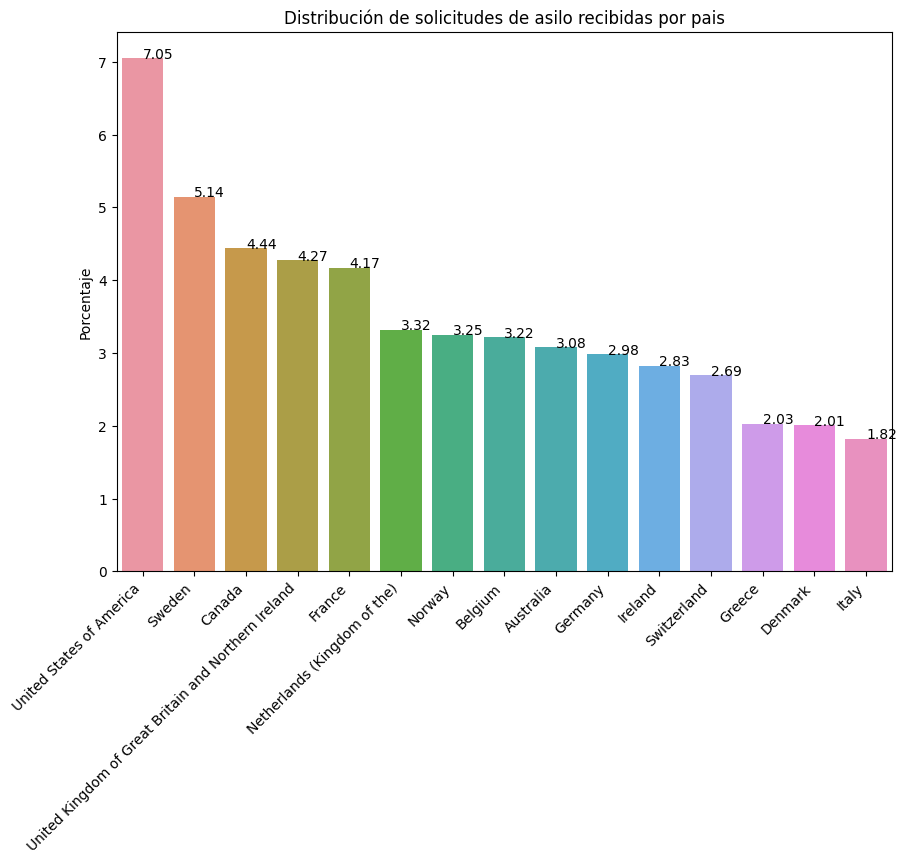

In [17]:
plt.figure(figsize=(10,7))
total_counts = len(asylum)
country_counts = asylum['Country of asylum'].value_counts().head(15)
country_percentages = (country_counts / total_counts) * 100
sns.barplot(x=country_percentages.index, y=country_percentages.values)
for index, value in enumerate(country_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=45,ha='right')
plt.ylabel('Porcentaje')
plt.title('Distribución de solicitudes de asilo recibidas por pais')

plt.show()

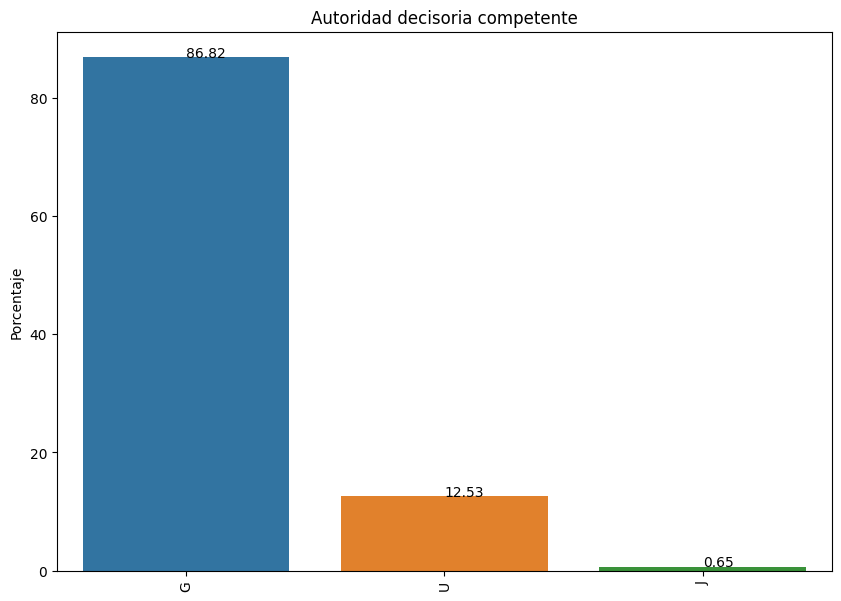

In [18]:
# veamos cómo se distribuyen las columnas Authority, observamos que casi un 90% de las solicitudes son resueltas por los gobiernos del páis de destino
plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Authority'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Porcentaje')
plt.title('Autoridad decisoria competente')
plt.show()


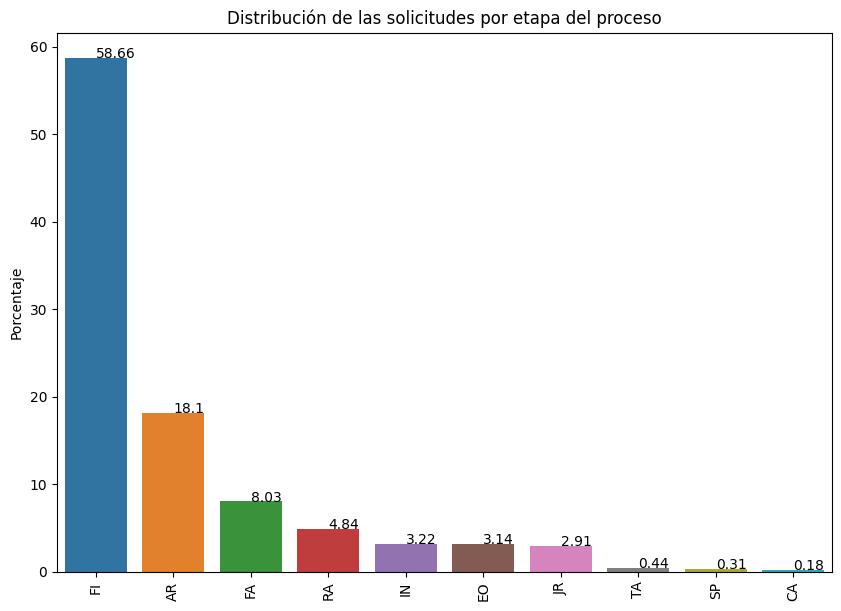

In [19]:
# lo mismo para Stage of procedure, más de la mitad de las solicitudes se encuentran en primera instancia
plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Stage of procedure'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Porcentaje')
plt.title('Distribución de las solicitudes por etapa del proceso')
plt.show()

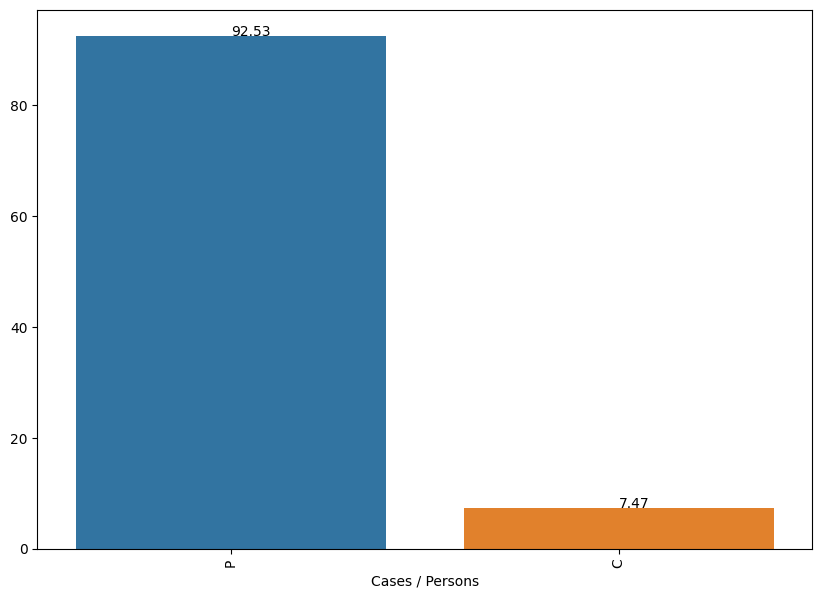

In [20]:
# Finalmente estudiamos la columna Cases / Persons, más del 90% de las solicitudes hacen referencia a individuos, aunque hay que tener en cuenta que un 7% de ellas corresponden a más de 1 persona
# por lo que el número total de personas desplazadas forzosamente será mayor que el número de solicitudes

plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Cases / Persons'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
plt.xlabel('Cases / Persons')
plt.xticks(rotation=90)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.show()

In [21]:
# Vamos a ahora buscar las mayores relaciones entre países de origen y destino, 
from_to_values = asylum.groupby(["Country of origin",'Country of asylum'])['Total decisions'].sum().reset_index().sort_values("Total decisions", ascending=False)
from_to_values["text"] = from_to_values.apply(lambda row:row["Country of origin"]+"-"+row["Country of asylum"],axis=1)
from_to_values = from_to_values.sort_values(["Total decisions"],ascending=False).head(25)

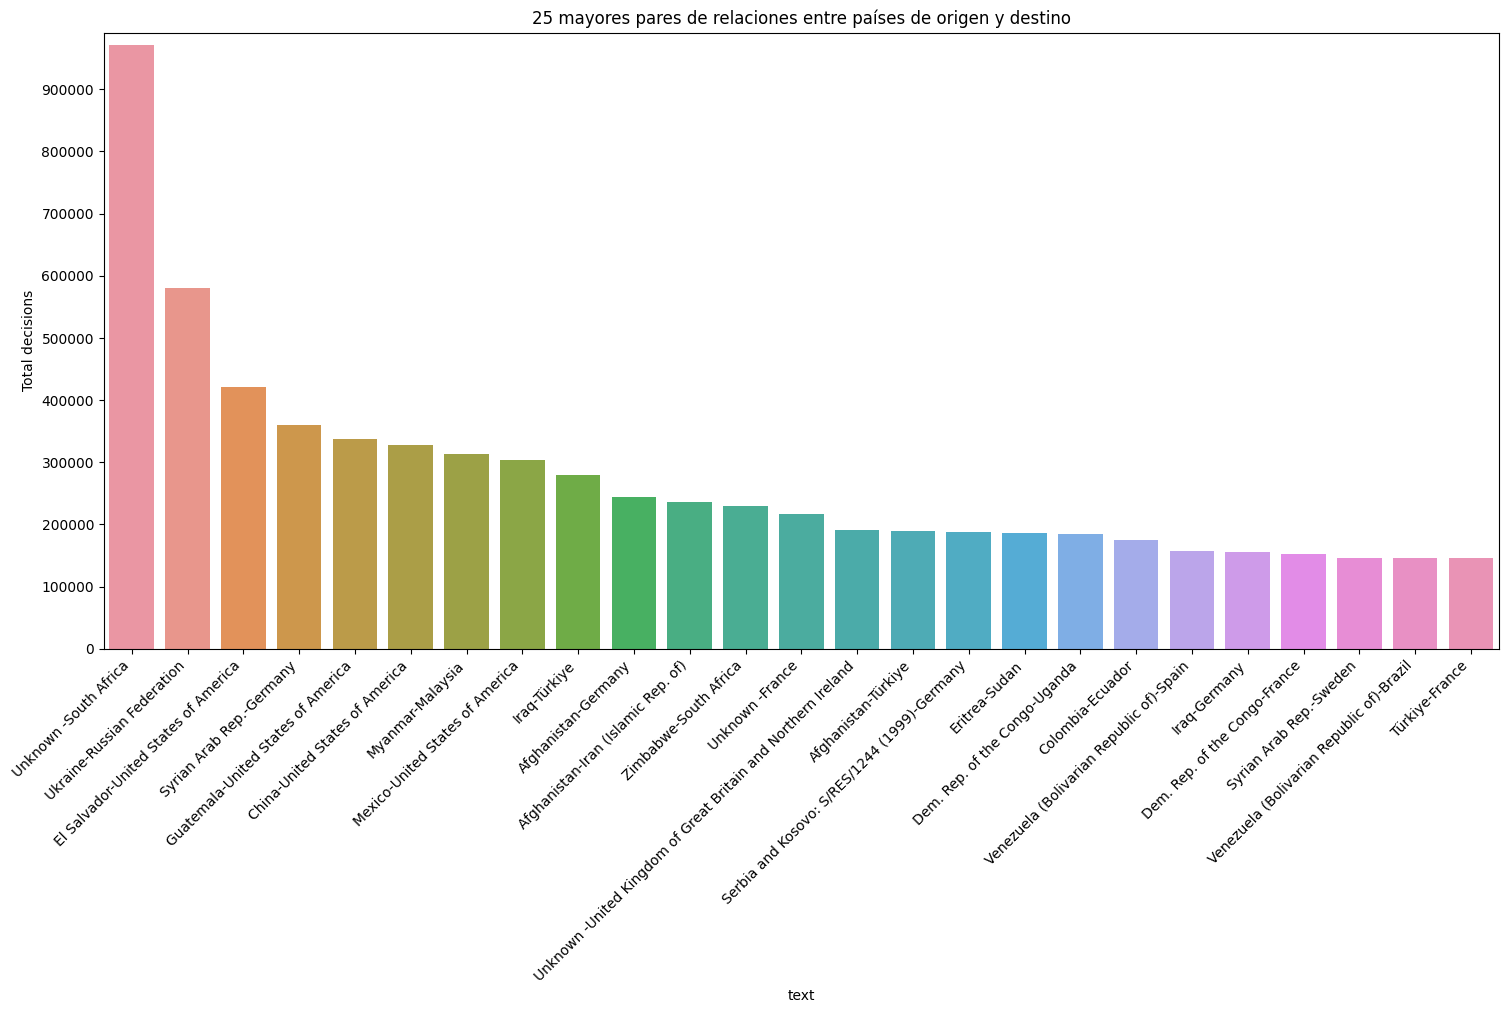

In [22]:
# Qué significa esto? Por ejemplo, se ve claramente cómo entre Siria y Alemania ha habido el mayor flujo en estos últimos 23 años.
plt.figure(figsize=(18,8));
ax = sns.barplot(x=from_to_values.text,y=from_to_values["Total decisions"]);
plt.title("25 mayores pares de relaciones entre países de origen y destino");
plt.xticks(rotation=45,ha='right');
plt.ylim(0, (from_to_values["Total decisions"]).max()+20000);
plt.yticks(np.arange(0, (from_to_values["Total decisions"]).max()+20000, 100000));
plt.show();

### En este apartado investigaremos cómo se han resuelto las peticiones de asilo de los mayores países peticionarios y los países que más solicitudes han recibido

In [23]:
# Veamos cuáles son las nacionalidades que más peticiones de asilo han realizado
origin = asylum.groupby('Country of origin')['Total decisions'].sum().reset_index().sort_values('Total decisions', ascending=False)
origin.head(10)

,Country of origin,Total decisions
197,Unknown,2018352
0,Afghanistan,1925760
87,Iraq,1321400
178,Syrian Arab Rep.,1273301
50,Dem. Rep. of the Congo,983247
192,Ukraine,816754
168,Somalia,802920
161,Serbia and Kosovo: S/RES/1244 (1999),763602
137,Pakistan,718683
36,China,686897


In [24]:
# Vamos a crear una función para dado un país crea el dataframe filtrado solo con ese pais como origen, agrupa por origen-asilo y sumas el número de solicitudes
# finalmente  crea las columnas con los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
def origin_country(country):
    origin_country = asylum[asylum['Country of origin']==country].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)
    origin_country['Recognized decisions %'] = origin_country['Recognized decisions']/origin_country['Total decisions']*100
    origin_country['Complementary protection %'] = origin_country['Complementary protection']/origin_country['Total decisions']*100
    origin_country['Rejected decisions %'] = origin_country['Rejected decisions']/origin_country['Total decisions']*100
    origin_country['Otherwise closed %'] = origin_country['Otherwise closed']/origin_country['Total decisions']*100
    origin_country = origin_country[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
    'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]
    return origin_country
    
# con al funcion origin_country creada crearemos otra para hacer el gráfico de barras apiladas de las decisiones tomadas con las solicitudes de asilo segñun el país de origen, 
# tomaremos solo los 7 paises de origen que más solicitudes de asilo han realizado 
def origin_country_graph(country,ax=None):
    origin_country_graph = origin_country(country)
    plt.figure(figsize=(10, 7))
    plt.bar(origin_country_graph['Country of asylum'].head(10), origin_country_graph['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
    plt.bar(origin_country_graph['Country of asylum'].head(10), origin_country_graph['Complementary protection %'].head(10), bottom=origin_country_graph['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
    plt.bar(origin_country_graph['Country of asylum'].head(10), origin_country_graph['Rejected decisions %'].head(10), bottom=origin_country_graph['Recognized decisions %'].head(10) + origin_country_graph['Complementary protection %'].head(10), label='Rejected decisions',color='red')
    plt.bar(origin_country_graph['Country of asylum'].head(10), origin_country_graph['Otherwise closed %'].head(10), bottom=origin_country_graph['Recognized decisions %'].head(10) + origin_country_graph['Complementary protection %'].head(10) + origin_country_graph['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')
    plt.legend(loc='center left', borderaxespad=0.)
    plt.title('Decisiones de solicitudes provinientes de '+country+' en otros países')
    plt.xlabel('Países de Asilo')
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Número de solicitudes')
    plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)
    plt.show()


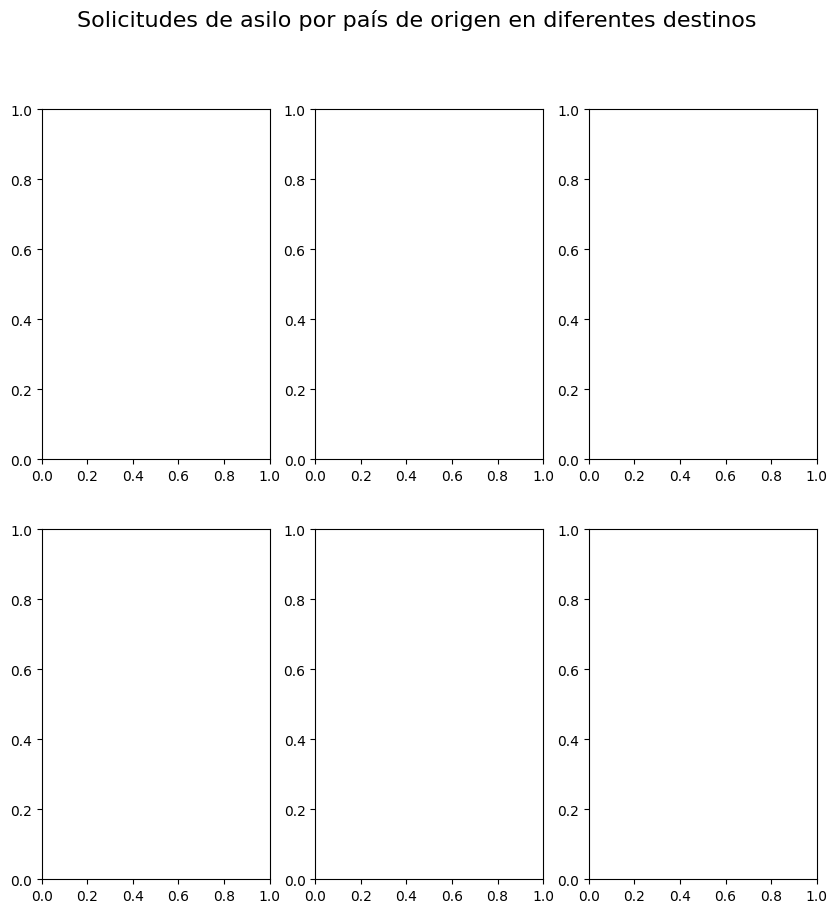

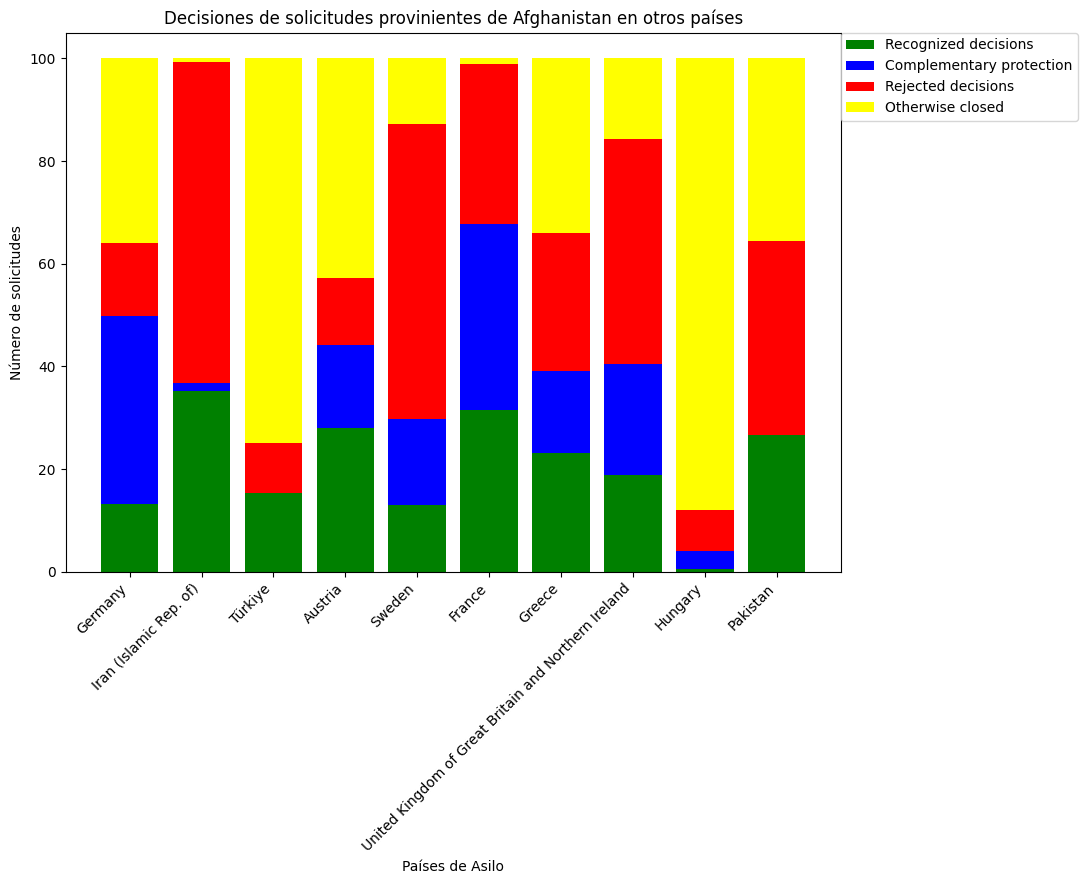

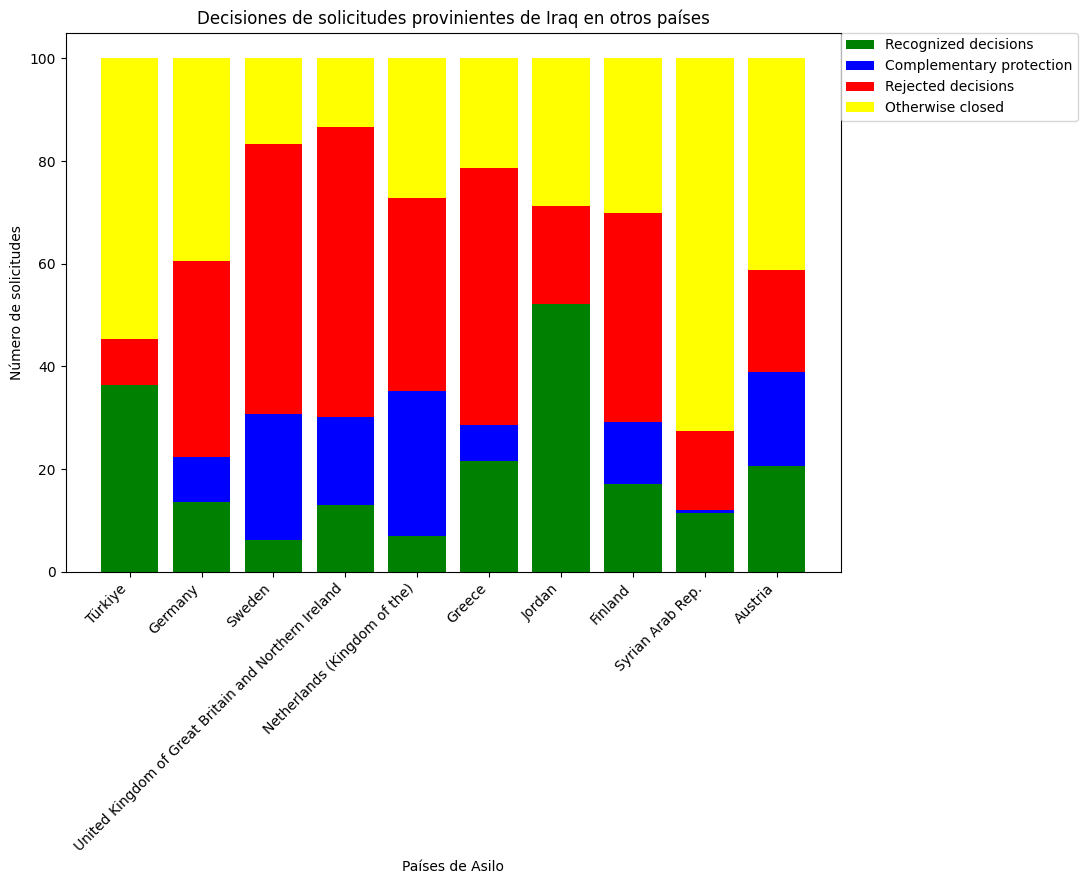

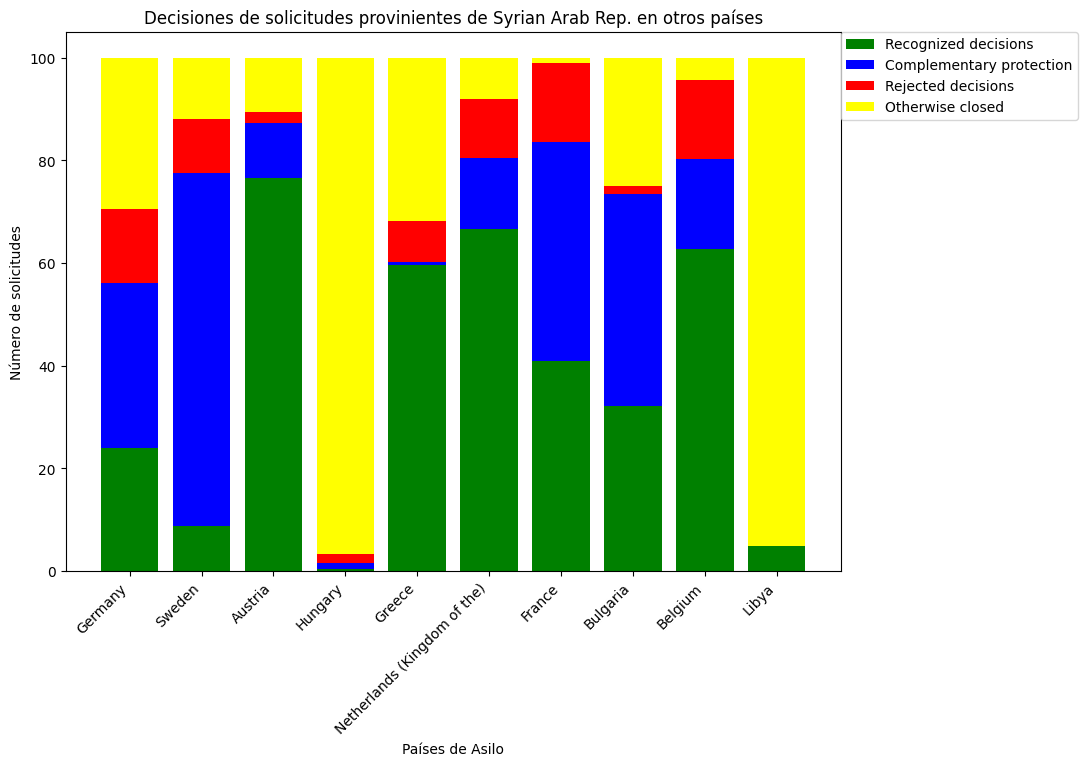

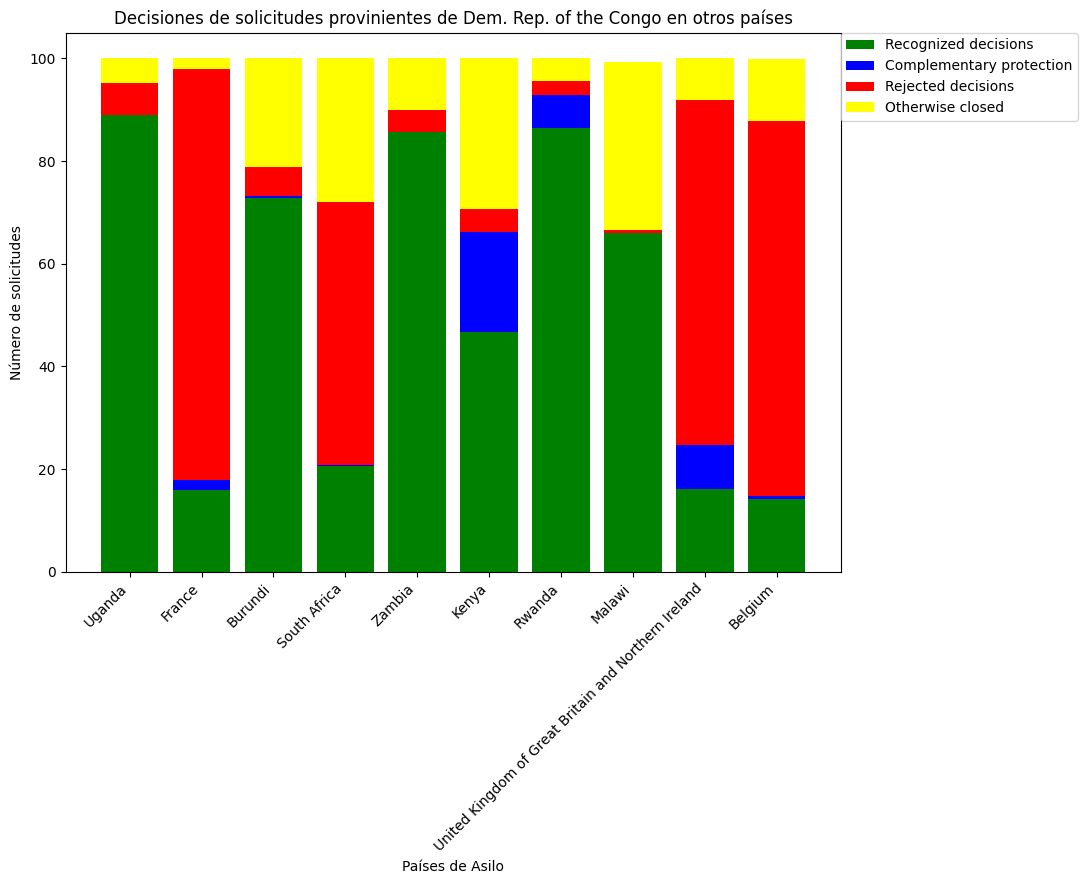

IndexError: index 2 is out of bounds for axis 0 with size 2

In [25]:
origins = ['Afghanistan', 'Iraq', 'Syrian Arab Rep.', 'Dem. Rep. of the Congo', 'Ukraine', 'Somalia']

# Crear subplots de 3 filas y 2 columnas
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
fig.suptitle('Solicitudes de asilo por país de origen en diferentes destinos', fontsize=16)

# Iterar sobre los países de destino y asignar cada gráfico a un subplot
for i, origin in enumerate(origins):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    origin_country_graph(origin, ax=ax)  # Pasar el eje correspondiente como argumento
    ax.set_title('Destino: {}'.format(origin))
    ax.set_xlabel('Países de destino')
    ax.set_ylabel('Número de Solicitudes de Asilo')

# Ajustar la disposición de los subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Veamos cuáles son las países que más solicitudes han recibido
destination = asylum.groupby('Country of asylum')['Total decisions'].sum().reset_index().sort_values('Total decisions', ascending=False)
destination.head(10)

,Country of asylum,Total decisions
174,United States of America,2828917
59,France,2577299
63,Germany,1914182
151,South Africa,1869582
172,United Kingdom of Great Britain and Northern I...,1535461
157,Sweden,1134817
81,Italy,897077
28,Canada,753258
65,Greece,748663
158,Switzerland,703738


In [ ]:
# Vamos a crear una función para dado un país crea el dataframe filtrado solo con ese pais como destino , agrupa por origen-asilo y sumas el número de solicitudes
# finalmente  crea las columnas con los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
def asylum_country(country):
    asylum_country = asylum[asylum['Country of asylum']==country].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)
    asylum_country['Recognized decisions %'] = asylum_country['Recognized decisions']/asylum_country['Total decisions']*100
    asylum_country['Complementary protection %'] = asylum_country['Complementary protection']/asylum_country['Total decisions']*100
    asylum_country['Rejected decisions %'] = asylum_country['Rejected decisions']/asylum_country['Total decisions']*100
    asylum_country['Otherwise closed %'] = asylum_country['Otherwise closed']/asylum_country['Total decisions']*100
    asylum_country = asylum_country[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
    'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]
    return asylum_country
    
# con al funcion asylum_country creada crearemos otra para hacer el gráfico de barras apiladas de las decisiones tomadas con las solicitudes de asilo segñun el país de origen, 
# tomaremos solo los 7 paises de origen que más solicitudes de asilo han realizado 
def asylum_country_graph(country):
    asylum_country_graph = asylum_country(country)
    plt.figure(figsize=(10, 7))
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Complementary protection %'].head(10), bottom=asylum_country_graph['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Rejected decisions %'].head(10), bottom=asylum_country_graph['Recognized decisions %'].head(10) + asylum_country_graph['Complementary protection %'].head(10), label='Rejected decisions',color='red')
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Otherwise closed %'].head(10), bottom=asylum_country_graph['Recognized decisions %'].head(10) + asylum_country_graph['Complementary protection %'].head(10) + asylum_country_graph['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')
    plt.legend(loc='center left', borderaxespad=0.)
    plt.title('Decisiones de solicitudes de asilo en '+country+' por país de origen')
    plt.xlabel('Países de Asilo')
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Número de Decisiones')
    plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)
    plt.show()


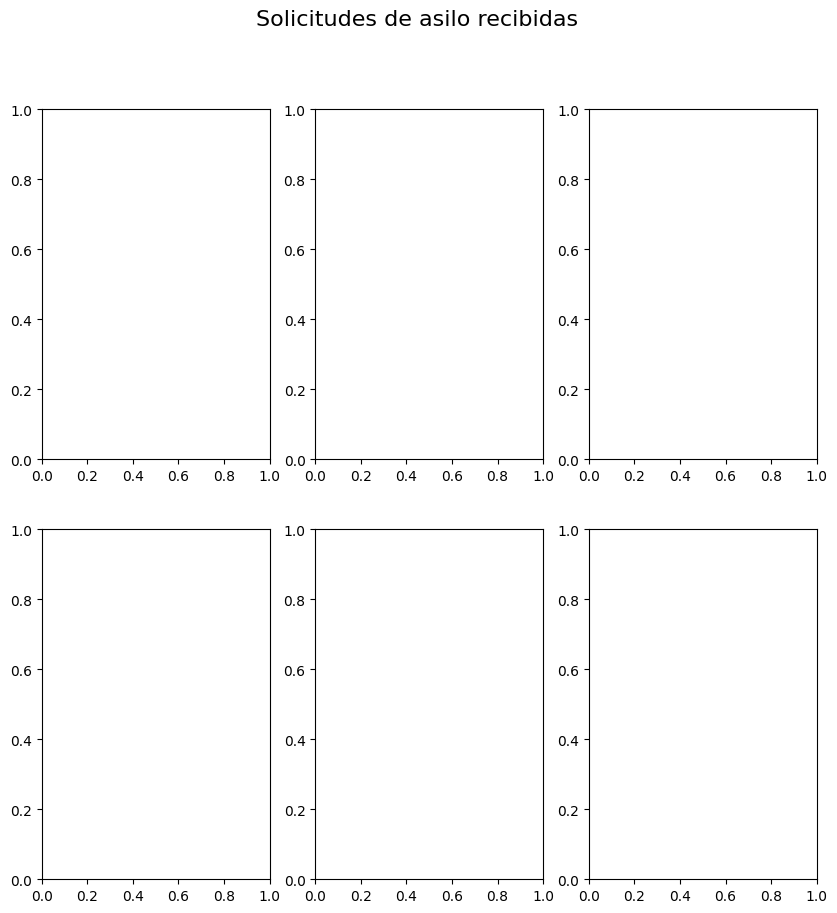

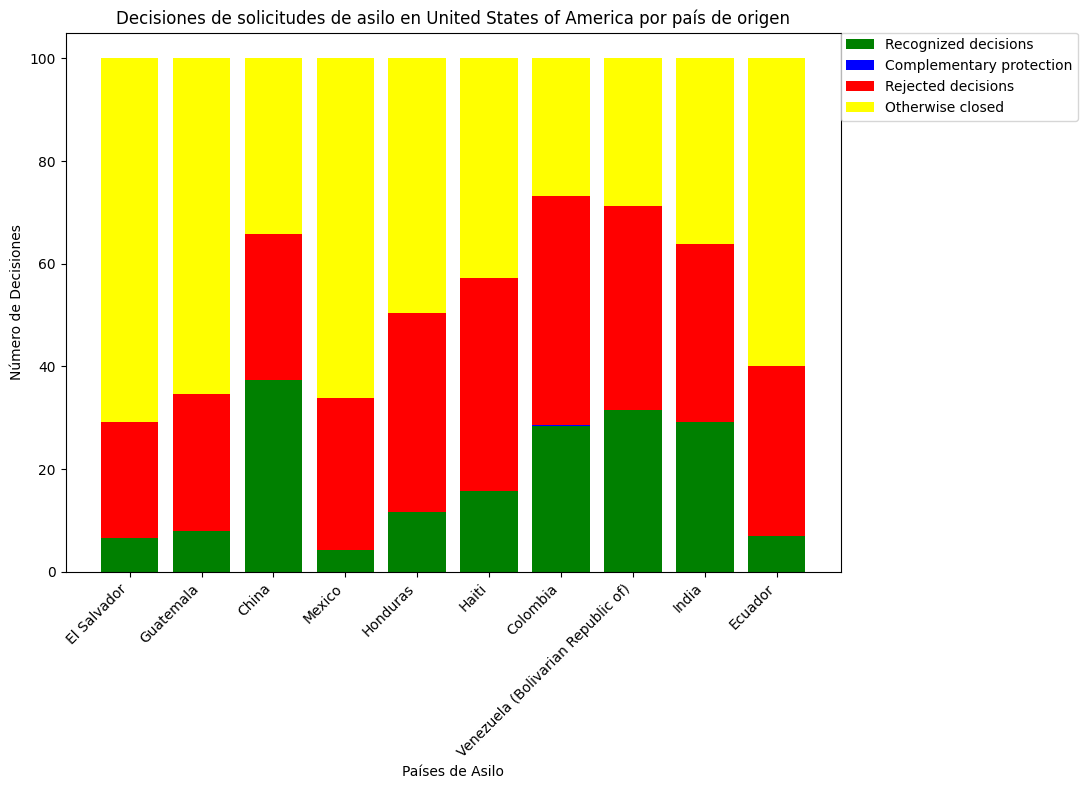

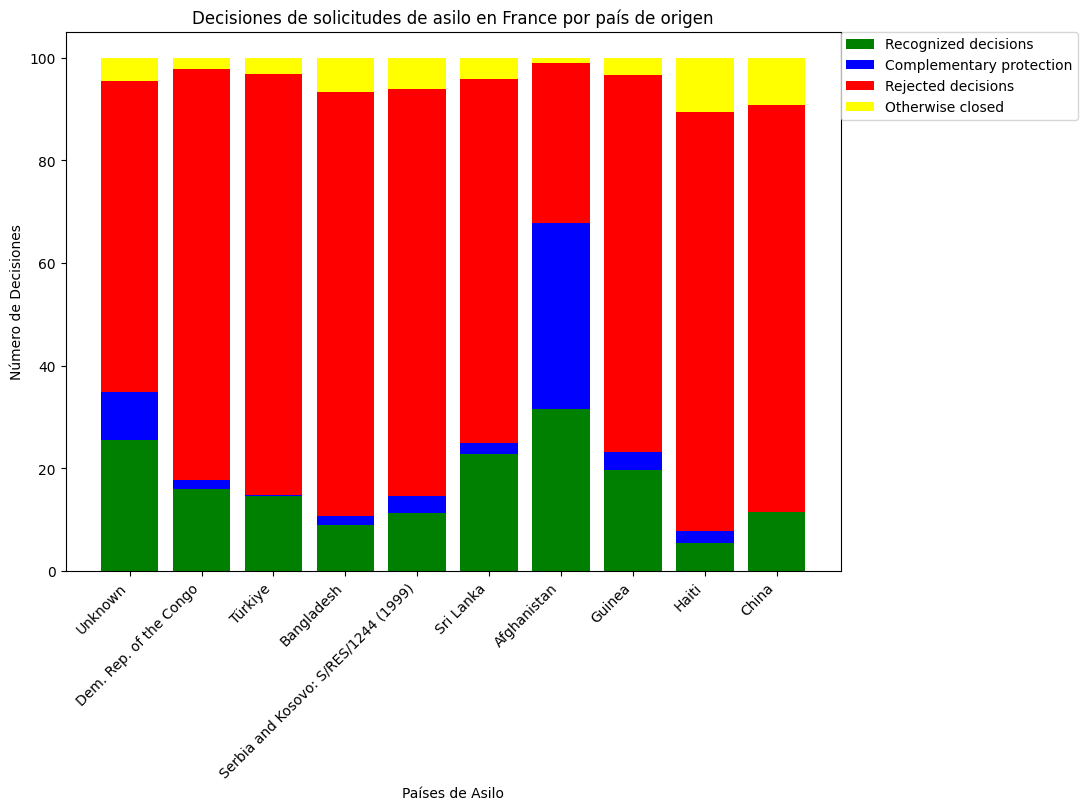

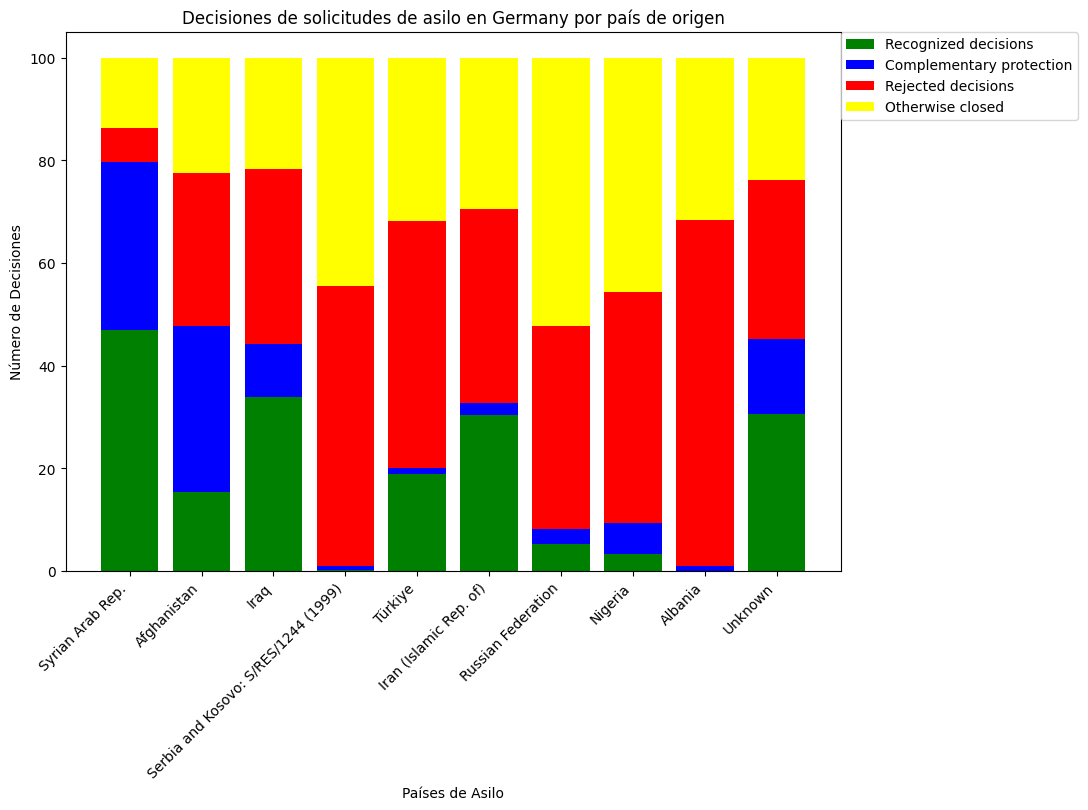

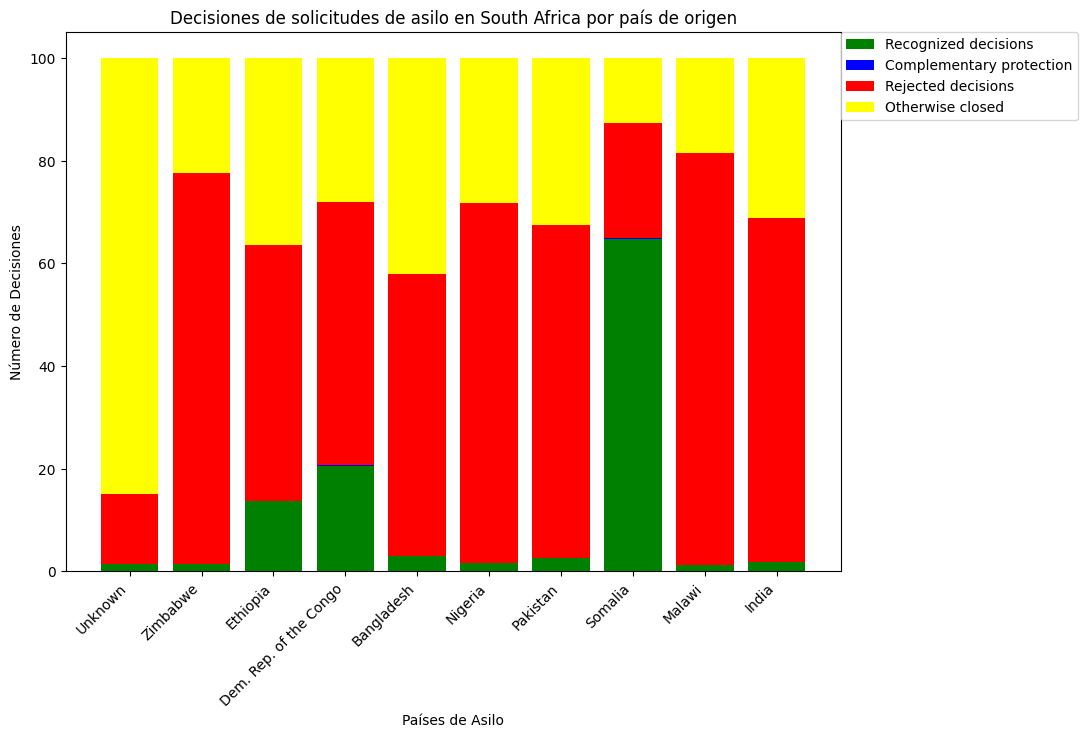

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
destinations = ['United States of America', 'France', 'Germany', 'South Africa', 'United Kingdom of Great Britain and Northern Ireland', 'Sweden']

# Crear subplots de 3 filas y 2 columnas
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
fig.suptitle('Solicitudes de asilo recibidas', fontsize=16)

# Iterar sobre los países de destino y asignar cada gráfico a un subplot
for i, destination in enumerate(destinations):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    asylum_country_graph(destination)  # Pasar el eje correspondiente como argumento
    ax.set_title('Destino: {}'.format(destination))
    ax.set_xlabel('Países solicitantes')
    ax.set_ylabel('Número de Solicitudes de Asilo')

# Ajustar la disposición de los subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
mapa_origin = gpd.read_file("Data/countries.geojson")
mapa_origin.rename(columns={'ISO_A3': 'Country of origin (ISO)', 'ADMIN':'Country'}, inplace=True)


asylum_map = asylum.groupby('Country of origin (ISO)').sum().reset_index()
asylum_map = asylum_map.drop(['Year'], axis=1)

mapa_origin = pd.merge(mapa_origin, asylum_map, on='Country of origin (ISO)', how='inner')
map_dict_origin = asylum_map.set_index('Country of origin (ISO)')['Total decisions'].to_dict()
#Mapa de países de asilo 
mapa_asylum = gpd.read_file("Data/countries.geojson") 
mapa_asylum.rename(columns={'ISO_A3': 'Country of asylum (ISO)', 'ADMIN':'Country'}, inplace=True) #renombramos la columna ISO_A3 a Country of asylum (ISO) para poder hacer el merge con population

#hacemos un df de asilo con los datos de pais de asilo ISO, total forced displacements, refugees under UNHCR's mandate, asylum-seekers, IDPs of concern to UNHCR
destination = asylum.groupby('Country of asylum (ISO)').sum().reset_index()
destination = destination.drop(['Year'], axis=1)

#mergeamos el mapa con el df de asilo
mapa_asylum = pd.merge(mapa_asylum, destination, on='Country of asylum (ISO)', how='inner')
map_dict_destination = destination.set_index('Country of asylum (ISO)')['Total decisions'].to_dict()
dual_map = folium.plugins.DualMap(location=[52.3680, 4.9036], zoom_start=3,layout="vertical")

color_scale_green = cm.linear.YlGn_07.scale(vmin = min(map_dict.values()), vmax = max(map_dict.values()))
def get_color_asylum(feature):
    country_name = feature['properties']['Country of asylum (ISO)']
    value = map_dict_destination.get(country_name)
    if value is None:
        return 'gray'  
    return color_scale_green(value)

color_scale_yll = cm.linear.YlOrRd_07.scale(vmin = min(map_dict.values()), vmax = max(map_dict.values()))
def get_color_origin(feature):
    country_name = feature['properties']['Country of origin (ISO)']
    value = map_dict_origin.get(country_name)
    if value is None:
        return 'gray'  
    return color_scale_yll(value)


# Agrega la capa de países de origen al mapa
folium.GeoJson(data=mapa_origin, 
               name='Origin',
               tooltip=folium.features.GeoJsonTooltip(fields=['Country','Recognized decisions', 'Complementary protection', 'Rejected decisions','Otherwise closed', 'Total decisions'], labels=True, sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color_origin(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity': 0.7},
               highlight_function=lambda feature: {'weight': 3, 'fillColor': get_color_origin(feature), 'fillOpacity': 1}).add_to(dual_map.m1)

# Agrega la capa de países de asilo al mapa
folium.GeoJson(data=mapa_asylum, 
               name='Asylum',
               tooltip=folium.features.GeoJsonTooltip(fields=['Country','Recognized decisions', 'Complementary protection', 'Rejected decisions','Otherwise closed', 'Total decisions'], labels=True, sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color_asylum(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity': 0.7},
               highlight_function=lambda feature: {'weight': 3, 'fillColor': get_color_asylum(feature), 'fillOpacity': 1}).add_to(dual_map.m2)

# Muestra el mapa combinado
dual_map


# Muestra el mapa combinado
dual_map